In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris['feature_names']
target_names = iris.target_names

#2項分類のサンプルにするためsetosaを削除する
X = X[y != 0]
y = y[y != 0]
y = y -1
target_names = target_names[1:]

print("データセット内容の種類")
print(iris.keys())
print("特徴量の種類")
print(iris['feature_names'])
print("ラベルの種類")
print(target_names)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train.shape = ', X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ', y_test.shape)

データセット内容の種類
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
特徴量の種類
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
ラベルの種類
['versicolor' 'virginica']
X_train.shape =  (80, 4)
y_train.shape =  (80,)
X_test.shape =  (20, 4)
y_test.shape =  (20,)


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = sklearn.ensemble.RandomForestClassifier(n_estimators=2, max_depth = 3, random_state=2)
model.fit(X_train, y_train)

accuracy_score(y_test, model.predict(X_test))

0.95

In [27]:
data_index = 0
print('target name = ' + target_names[y_test[data_index]])
pd.DataFrame([X_test[data_index]], columns=feature_names)

target name = virginica


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,6.3,2.8,5.1,1.5


In [28]:
X_train_dataframe = pd.DataFrame(X_train, columns=iris.feature_names)

y_label = []
for i in y_train:
    y_label.append(target_names[i])
y_train_dataframe = pd.DataFrame(y_label, columns=['result'])

train_dataframe = pd.concat([X_train_dataframe, y_train_dataframe], axis=1)

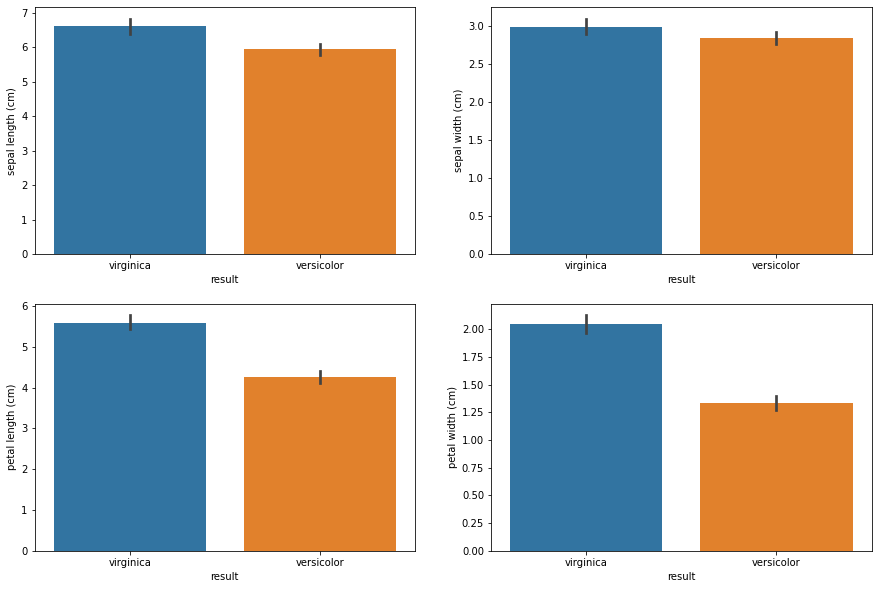

In [29]:
import seaborn as sns

fig = plt.figure(figsize=[15,10])
for i, f in enumerate(iris['feature_names']):
    fig.add_subplot(2, 2, i+1)
    sns.barplot(y=f, x='result', data= train_dataframe)

In [31]:
import shap

exp = shap.TreeExplainer(model)
shap_values = exp.shap_values(X_test)
shap_values = shap_values[1] #category=1(virginica)について分析を行う

print('shap_values.shape = ', shap_values.shape)

shap_values.shape =  (20, 4)


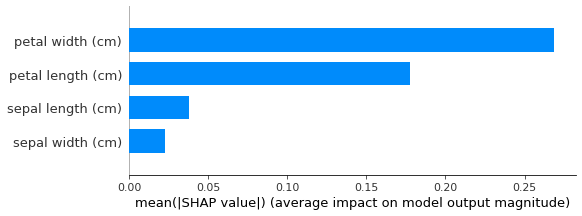

In [36]:
shap.summary_plot(shap_values=shap_values,
                  features=X_test,
                  feature_names=feature_names,
                  plot_type="bar")

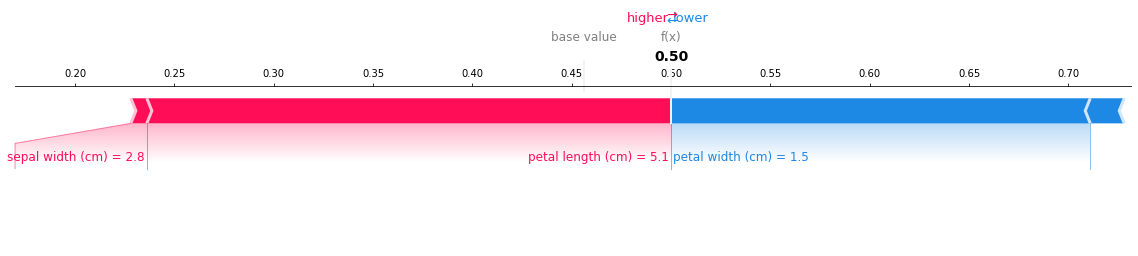

In [17]:
shap.force_plot(base_value=exp.expected_value[1],
                shap_values=sv_test[0], 
                features=X_test[0],
                feature_names=feature_names,
                matplotlib=True)

In [14]:
shap_values

[array([[ 0.01711957, -0.00803571, -0.26383929,  0.21100543],
        [ 0.00625   , -0.00803571, -0.13883929, -0.403125  ],
        [ 0.00625   ,  0.01875   , -0.165625  , -0.403125  ],
        [ 0.01711957, -0.00803571,  0.22991071,  0.21725543],
        [ 0.01711957, -0.00803571,  0.22991071,  0.21725543],
        [ 0.01711957, -0.00803571,  0.22991071,  0.21725543],
        [ 0.01711957, -0.07232143, -0.128125  ,  0.21100543],
        [-0.1375    , -0.00803571, -0.13883929, -0.259375  ],
        [ 0.01711957, -0.00803571,  0.22991071,  0.21725543],
        [-0.37663043,  0.01875   ,  0.203125  ,  0.11100543],
        [ 0.01711957, -0.00803571,  0.22991071,  0.21725543],
        [ 0.01711957, -0.00803571,  0.22991071,  0.21725543],
        [ 0.00625   , -0.07232143, -0.003125  , -0.403125  ],
        [ 0.01711957, -0.00803571, -0.26383929,  0.21100543],
        [ 0.00625   ,  0.01875   , -0.165625  , -0.403125  ],
        [ 0.01711957, -0.00803571,  0.22991071,  0.21725543],
        

In [13]:
shap.plots.waterfall(shap_values[1])

AttributeError: 'numpy.ndarray' object has no attribute 'base_values'

In [ ]:
exp.expected_value

In [ ]:
shap_values

In [ ]:
shap.summary_plot(shap_values, X, plot_type="bar")

In [ ]:
shap.force_plot(base_value=exp.expected_value[1],
                shap_values=sv_test[0], 
                features=X_test[0],
                feature_names=feature_names,
                matplotlib=True)

In [ ]:
shap.decision_plot(base_value=exp.expected_value[1],
                shap_values=sv_test[0], 
                features=X_test[0],
                feature_names=feature_names)